Copyright 2017 Google Inc. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


## AI Adventures 10: Fashion MNIST
A (fashionable) notebook by `@yufengg`

In [1]:
%%bash 
rm -r /tmp/tfmodels/fashion_mnist

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

tf.logging.set_verbosity(tf.logging.INFO)

print(tf.__version__)

base_model_dir = "/tmp/tfmodels/fashion_mnist/"


/root/anaconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


1.4.0


In [3]:
feature_columns = [tf.feature_column.numeric_column(
    "pixels", shape=784)]

In [4]:
classifier = tf.estimator.LinearClassifier(
        feature_columns=feature_columns, 
        n_classes=10,
        model_dir=base_model_dir + "linear"
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tfmodels/fashion_mnist/linear', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe93c5aafd0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [5]:
def make_input_fn(data, batch_size, num_epochs, shuffle):
    return tf.estimator.inputs.numpy_input_fn(
             x={'pixels': data.images},
             y=data.labels.astype(np.int64),
             batch_size=batch_size,
             num_epochs=num_epochs,
             shuffle=shuffle)

In [6]:
DATA_SETS = input_data.read_data_sets(
    "data/fashion")

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [7]:
DATA_SETS.train.labels

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [8]:
classifier.train(input_fn=make_input_fn(DATA_SETS.train, 
                               batch_size=100, 
                               num_epochs=100, 
                               shuffle=True))

accuracy_score = classifier.evaluate(
    input_fn=make_input_fn(
        DATA_SETS.test, 
        batch_size=100, 
        num_epochs=1, 
        shuffle=False))['accuracy']

print(accuracy_score)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tfmodels/fashion_mnist/linear/model.ckpt.
INFO:tensorflow:loss = 230.259, step = 1
INFO:tensorflow:global_step/sec: 506.2
INFO:tensorflow:loss = 110.559, step = 101 (0.199 sec)
INFO:tensorflow:global_step/sec: 559.652
INFO:tensorflow:loss = 54.4749, step = 201 (0.180 sec)
INFO:tensorflow:global_step/sec: 577.085
INFO:tensorflow:loss = 69.642, step = 301 (0.172 sec)
INFO:tensorflow:global_step/sec: 575.14
INFO:tensorflow:loss = 63.4095, step = 401 (0.174 sec)
INFO:tensorflow:global_step/sec: 577.858
INFO:tensorflow:loss = 58.4059, step = 501 (0.173 sec)
INFO:tensorflow:global_step/sec: 606.403
INFO:tensorflow:loss = 66.5215, step = 601 (0.165 sec)
INFO:tensorflow:global_step/sec: 596.493
INFO:tensorflow:loss = 74.5362, step = 701 (0.168 sec)
INFO:tensorflow:global_step/sec: 592.689
INFO:tensorflow:loss = 42.2255, step = 801 (0.170 sec)
INFO:tensorflow:global_step/sec: 585.256
INFO:tensorflow:l

INFO:tensorflow:global_step/sec: 601.84
INFO:tensorflow:loss = 39.5893, step = 8401 (0.166 sec)
INFO:tensorflow:global_step/sec: 611.375
INFO:tensorflow:loss = 31.0387, step = 8501 (0.163 sec)
INFO:tensorflow:global_step/sec: 582.305
INFO:tensorflow:loss = 38.6372, step = 8601 (0.172 sec)
INFO:tensorflow:global_step/sec: 573.105
INFO:tensorflow:loss = 45.5624, step = 8701 (0.175 sec)
INFO:tensorflow:global_step/sec: 588.266
INFO:tensorflow:loss = 33.2082, step = 8801 (0.169 sec)
INFO:tensorflow:global_step/sec: 537.352
INFO:tensorflow:loss = 29.0959, step = 8901 (0.187 sec)
INFO:tensorflow:global_step/sec: 594.332
INFO:tensorflow:loss = 38.3047, step = 9001 (0.167 sec)
INFO:tensorflow:global_step/sec: 569.056
INFO:tensorflow:loss = 29.7928, step = 9101 (0.176 sec)
INFO:tensorflow:global_step/sec: 591.516
INFO:tensorflow:loss = 36.1539, step = 9201 (0.169 sec)
INFO:tensorflow:global_step/sec: 610.476
INFO:tensorflow:loss = 47.9501, step = 9301 (0.164 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 615.158
INFO:tensorflow:loss = 47.1959, step = 16801 (0.164 sec)
INFO:tensorflow:global_step/sec: 587.77
INFO:tensorflow:loss = 42.1065, step = 16901 (0.171 sec)
INFO:tensorflow:global_step/sec: 572.154
INFO:tensorflow:loss = 39.8565, step = 17001 (0.173 sec)
INFO:tensorflow:global_step/sec: 593.653
INFO:tensorflow:loss = 53.4287, step = 17101 (0.168 sec)
INFO:tensorflow:global_step/sec: 577.876
INFO:tensorflow:loss = 24.2865, step = 17201 (0.173 sec)
INFO:tensorflow:global_step/sec: 592.821
INFO:tensorflow:loss = 44.3595, step = 17301 (0.169 sec)
INFO:tensorflow:global_step/sec: 605.783
INFO:tensorflow:loss = 36.4536, step = 17401 (0.165 sec)
INFO:tensorflow:global_step/sec: 611.081
INFO:tensorflow:loss = 42.2969, step = 17501 (0.163 sec)
INFO:tensorflow:global_step/sec: 603.65
INFO:tensorflow:loss = 31.4138, step = 17601 (0.166 sec)
INFO:tensorflow:global_step/sec: 547.53
INFO:tensorflow:loss = 41.2602, step = 17701 (0.182 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 569.024
INFO:tensorflow:loss = 32.569, step = 25201 (0.176 sec)
INFO:tensorflow:global_step/sec: 571.342
INFO:tensorflow:loss = 29.7441, step = 25301 (0.175 sec)
INFO:tensorflow:global_step/sec: 606.374
INFO:tensorflow:loss = 34.4803, step = 25401 (0.165 sec)
INFO:tensorflow:global_step/sec: 588.422
INFO:tensorflow:loss = 47.2499, step = 25501 (0.170 sec)
INFO:tensorflow:global_step/sec: 615.578
INFO:tensorflow:loss = 30.0391, step = 25601 (0.163 sec)
INFO:tensorflow:global_step/sec: 602.247
INFO:tensorflow:loss = 36.4484, step = 25701 (0.166 sec)
INFO:tensorflow:global_step/sec: 599.92
INFO:tensorflow:loss = 46.4428, step = 25801 (0.167 sec)
INFO:tensorflow:global_step/sec: 597.745
INFO:tensorflow:loss = 30.5008, step = 25901 (0.167 sec)
INFO:tensorflow:global_step/sec: 610.833
INFO:tensorflow:loss = 28.8112, step = 26001 (0.164 sec)
INFO:tensorflow:global_step/sec: 611.822
INFO:tensorflow:loss = 39.0861, step = 26101 (0.163 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 586.76
INFO:tensorflow:loss = 52.8163, step = 33601 (0.170 sec)
INFO:tensorflow:global_step/sec: 584.276
INFO:tensorflow:loss = 34.024, step = 33701 (0.172 sec)
INFO:tensorflow:global_step/sec: 569.716
INFO:tensorflow:loss = 32.2969, step = 33801 (0.175 sec)
INFO:tensorflow:global_step/sec: 600.325
INFO:tensorflow:loss = 40.9445, step = 33901 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.963
INFO:tensorflow:loss = 30.3512, step = 34001 (0.166 sec)
INFO:tensorflow:global_step/sec: 588.386
INFO:tensorflow:loss = 32.0088, step = 34101 (0.170 sec)
INFO:tensorflow:global_step/sec: 614.304
INFO:tensorflow:loss = 30.986, step = 34201 (0.164 sec)
INFO:tensorflow:global_step/sec: 590.404
INFO:tensorflow:loss = 27.098, step = 34301 (0.168 sec)
INFO:tensorflow:global_step/sec: 574.602
INFO:tensorflow:loss = 41.1442, step = 34401 (0.176 sec)
INFO:tensorflow:global_step/sec: 567.318
INFO:tensorflow:loss = 40.6348, step = 34501 (0.175 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 609.398
INFO:tensorflow:loss = 43.4329, step = 42001 (0.164 sec)
INFO:tensorflow:global_step/sec: 647.353
INFO:tensorflow:loss = 37.5954, step = 42101 (0.154 sec)
INFO:tensorflow:global_step/sec: 647.601
INFO:tensorflow:loss = 30.5449, step = 42201 (0.154 sec)
INFO:tensorflow:global_step/sec: 656.93
INFO:tensorflow:loss = 30.7953, step = 42301 (0.152 sec)
INFO:tensorflow:global_step/sec: 637.054
INFO:tensorflow:loss = 41.6762, step = 42401 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.433
INFO:tensorflow:loss = 22.9116, step = 42501 (0.157 sec)
INFO:tensorflow:global_step/sec: 610.056
INFO:tensorflow:loss = 38.8793, step = 42601 (0.164 sec)
INFO:tensorflow:global_step/sec: 612.726
INFO:tensorflow:loss = 34.268, step = 42701 (0.163 sec)
INFO:tensorflow:global_step/sec: 602.755
INFO:tensorflow:loss = 27.7925, step = 42801 (0.166 sec)
INFO:tensorflow:global_step/sec: 615.44
INFO:tensorflow:loss = 39.8714, step = 42901 (0.163 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 566.251
INFO:tensorflow:loss = 37.9475, step = 50401 (0.176 sec)
INFO:tensorflow:global_step/sec: 448.456
INFO:tensorflow:loss = 29.9786, step = 50501 (0.226 sec)
INFO:tensorflow:global_step/sec: 525.993
INFO:tensorflow:loss = 38.5098, step = 50601 (0.188 sec)
INFO:tensorflow:global_step/sec: 504.247
INFO:tensorflow:loss = 28.1697, step = 50701 (0.199 sec)
INFO:tensorflow:global_step/sec: 507.473
INFO:tensorflow:loss = 42.5529, step = 50801 (0.196 sec)
INFO:tensorflow:global_step/sec: 515.677
INFO:tensorflow:loss = 41.2506, step = 50901 (0.194 sec)
INFO:tensorflow:global_step/sec: 473.274
INFO:tensorflow:loss = 39.0371, step = 51001 (0.211 sec)
INFO:tensorflow:global_step/sec: 593.796
INFO:tensorflow:loss = 42.8898, step = 51101 (0.168 sec)
INFO:tensorflow:global_step/sec: 582.478
INFO:tensorflow:loss = 31.6326, step = 51201 (0.172 sec)
INFO:tensorflow:global_step/sec: 590.069
INFO:tensorflow:loss = 32.6315, step = 51301 (0.173 sec)
INFO:tensorflow:glob

## Deep Classifier

In [9]:
deep_classifier = tf.estimator.DNNClassifier(
        feature_columns=feature_columns, 
        n_classes=10,
        hidden_units=[100, 75, 50],
        model_dir=base_model_dir + "deep"
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tfmodels/fashion_mnist/deep', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe936f77208>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [10]:
deep_classifier.train(input_fn=make_input_fn(DATA_SETS.train, 
                               batch_size=100, 
                               num_epochs=100, 
                               shuffle=True))

accuracy_score = deep_classifier.evaluate(
    input_fn=make_input_fn(
        DATA_SETS.test, 
        batch_size=100, 
        num_epochs=1, 
        shuffle=False))['accuracy']

print(accuracy_score)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tfmodels/fashion_mnist/deep/model.ckpt.
INFO:tensorflow:loss = 238.954, step = 1
INFO:tensorflow:global_step/sec: 283.952
INFO:tensorflow:loss = 85.4979, step = 101 (0.355 sec)
INFO:tensorflow:global_step/sec: 326.194
INFO:tensorflow:loss = 57.2575, step = 201 (0.305 sec)
INFO:tensorflow:global_step/sec: 309.516
INFO:tensorflow:loss = 42.4278, step = 301 (0.323 sec)
INFO:tensorflow:global_step/sec: 317.031
INFO:tensorflow:loss = 43.2911, step = 401 (0.315 sec)
INFO:tensorflow:global_step/sec: 294.908
INFO:tensorflow:loss = 48.5353, step = 501 (0.341 sec)
INFO:tensorflow:global_step/sec: 320.604
INFO:tensorflow:loss = 45.9736, step = 601 (0.311 sec)
INFO:tensorflow:global_step/sec: 329.939
INFO:tensorflow:loss = 33.6357, step = 701 (0.302 sec)
INFO:tensorflow:global_step/sec: 304.677
INFO:tensorflow:loss = 32.4852, step = 801 (0.329 sec)
INFO:tensorflow:global_step/sec: 302.971
INFO:tensorflow

INFO:tensorflow:global_step/sec: 325.586
INFO:tensorflow:loss = 26.5997, step = 8401 (0.305 sec)
INFO:tensorflow:global_step/sec: 306.813
INFO:tensorflow:loss = 30.0166, step = 8501 (0.326 sec)
INFO:tensorflow:global_step/sec: 326.941
INFO:tensorflow:loss = 32.6042, step = 8601 (0.306 sec)
INFO:tensorflow:global_step/sec: 320.572
INFO:tensorflow:loss = 23.7755, step = 8701 (0.312 sec)
INFO:tensorflow:global_step/sec: 301.003
INFO:tensorflow:loss = 22.95, step = 8801 (0.332 sec)
INFO:tensorflow:global_step/sec: 308.948
INFO:tensorflow:loss = 29.3422, step = 8901 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.949
INFO:tensorflow:loss = 35.12, step = 9001 (0.319 sec)
INFO:tensorflow:global_step/sec: 318.365
INFO:tensorflow:loss = 23.0697, step = 9101 (0.314 sec)
INFO:tensorflow:global_step/sec: 311.737
INFO:tensorflow:loss = 26.3248, step = 9201 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.801
INFO:tensorflow:loss = 16.2002, step = 9301 (0.325 sec)
INFO:tensorflow:global_step/sec: 3

INFO:tensorflow:global_step/sec: 325.813
INFO:tensorflow:loss = 20.4897, step = 16801 (0.307 sec)
INFO:tensorflow:global_step/sec: 327.793
INFO:tensorflow:loss = 19.5857, step = 16901 (0.305 sec)
INFO:tensorflow:global_step/sec: 333.003
INFO:tensorflow:loss = 30.0128, step = 17001 (0.300 sec)
INFO:tensorflow:global_step/sec: 309.895
INFO:tensorflow:loss = 21.4335, step = 17101 (0.323 sec)
INFO:tensorflow:global_step/sec: 298.144
INFO:tensorflow:loss = 23.1024, step = 17201 (0.335 sec)
INFO:tensorflow:global_step/sec: 310.467
INFO:tensorflow:loss = 25.8017, step = 17301 (0.324 sec)
INFO:tensorflow:global_step/sec: 326.319
INFO:tensorflow:loss = 17.7822, step = 17401 (0.305 sec)
INFO:tensorflow:global_step/sec: 302.445
INFO:tensorflow:loss = 20.5436, step = 17501 (0.331 sec)
INFO:tensorflow:global_step/sec: 294.598
INFO:tensorflow:loss = 19.8378, step = 17601 (0.340 sec)
INFO:tensorflow:global_step/sec: 304.758
INFO:tensorflow:loss = 30.0815, step = 17701 (0.328 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 305.204
INFO:tensorflow:loss = 29.3528, step = 25201 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.236
INFO:tensorflow:loss = 16.3109, step = 25301 (0.329 sec)
INFO:tensorflow:global_step/sec: 313.996
INFO:tensorflow:loss = 21.4691, step = 25401 (0.319 sec)
INFO:tensorflow:global_step/sec: 317.85
INFO:tensorflow:loss = 14.7889, step = 25501 (0.315 sec)
INFO:tensorflow:global_step/sec: 320.688
INFO:tensorflow:loss = 14.8549, step = 25601 (0.312 sec)
INFO:tensorflow:global_step/sec: 308.75
INFO:tensorflow:loss = 28.2761, step = 25701 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.33
INFO:tensorflow:loss = 17.4123, step = 25801 (0.319 sec)
INFO:tensorflow:global_step/sec: 338.267
INFO:tensorflow:loss = 19.5895, step = 25901 (0.296 sec)
INFO:tensorflow:global_step/sec: 309.226
INFO:tensorflow:loss = 26.9501, step = 26001 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.639
INFO:tensorflow:loss = 25.5464, step = 26101 (0.322 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 324.475
INFO:tensorflow:loss = 11.4579, step = 33601 (0.310 sec)
INFO:tensorflow:global_step/sec: 315.041
INFO:tensorflow:loss = 19.0763, step = 33701 (0.317 sec)
INFO:tensorflow:global_step/sec: 306.29
INFO:tensorflow:loss = 24.0651, step = 33801 (0.327 sec)
INFO:tensorflow:global_step/sec: 326.989
INFO:tensorflow:loss = 14.0863, step = 33901 (0.306 sec)
INFO:tensorflow:global_step/sec: 319.679
INFO:tensorflow:loss = 29.1919, step = 34001 (0.312 sec)
INFO:tensorflow:global_step/sec: 300.416
INFO:tensorflow:loss = 12.8309, step = 34101 (0.333 sec)
INFO:tensorflow:global_step/sec: 304.175
INFO:tensorflow:loss = 17.0714, step = 34201 (0.329 sec)
INFO:tensorflow:global_step/sec: 317.478
INFO:tensorflow:loss = 19.7944, step = 34301 (0.315 sec)
INFO:tensorflow:global_step/sec: 306.928
INFO:tensorflow:loss = 9.32057, step = 34401 (0.326 sec)
INFO:tensorflow:global_step/sec: 334.213
INFO:tensorflow:loss = 18.5911, step = 34501 (0.299 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 321.854
INFO:tensorflow:loss = 21.9746, step = 42001 (0.311 sec)
INFO:tensorflow:global_step/sec: 309.722
INFO:tensorflow:loss = 13.2626, step = 42101 (0.322 sec)
INFO:tensorflow:global_step/sec: 321.775
INFO:tensorflow:loss = 23.3858, step = 42201 (0.311 sec)
INFO:tensorflow:global_step/sec: 303.086
INFO:tensorflow:loss = 10.0864, step = 42301 (0.332 sec)
INFO:tensorflow:global_step/sec: 320.623
INFO:tensorflow:loss = 11.0848, step = 42401 (0.310 sec)
INFO:tensorflow:global_step/sec: 311.808
INFO:tensorflow:loss = 25.1279, step = 42501 (0.321 sec)
INFO:tensorflow:global_step/sec: 323.801
INFO:tensorflow:loss = 14.914, step = 42601 (0.310 sec)
INFO:tensorflow:global_step/sec: 320.051
INFO:tensorflow:loss = 14.2558, step = 42701 (0.312 sec)
INFO:tensorflow:global_step/sec: 310.47
INFO:tensorflow:loss = 18.9655, step = 42801 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.113
INFO:tensorflow:loss = 13.7352, step = 42901 (0.318 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 305.07
INFO:tensorflow:loss = 20.506, step = 50401 (0.328 sec)
INFO:tensorflow:global_step/sec: 325.609
INFO:tensorflow:loss = 10.3809, step = 50501 (0.308 sec)
INFO:tensorflow:global_step/sec: 325.323
INFO:tensorflow:loss = 9.03395, step = 50601 (0.306 sec)
INFO:tensorflow:global_step/sec: 299.15
INFO:tensorflow:loss = 15.213, step = 50701 (0.334 sec)
INFO:tensorflow:global_step/sec: 327.524
INFO:tensorflow:loss = 13.3093, step = 50801 (0.305 sec)
INFO:tensorflow:global_step/sec: 303.842
INFO:tensorflow:loss = 17.8882, step = 50901 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.114
INFO:tensorflow:loss = 13.8279, step = 51001 (0.320 sec)
INFO:tensorflow:global_step/sec: 326.933
INFO:tensorflow:loss = 23.7423, step = 51101 (0.306 sec)
INFO:tensorflow:global_step/sec: 305.659
INFO:tensorflow:loss = 15.4336, step = 51201 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.566
INFO:tensorflow:loss = 16.5018, step = 51301 (0.323 sec)
INFO:tensorflow:global_s

In [11]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(        
        x={'pixels': DATA_SETS.test.images[5000:5005]},
        batch_size=1,
        num_epochs=1,
        shuffle=False)
predictions = deep_classifier.predict(input_fn=predict_input_fn)

for prediction in predictions:
    print("Predictions:    {} with probabilities {}\n".format(
        prediction["classes"], prediction["probabilities"]))
print('Expected answers values: {}'.format(
    DATA_SETS.test.labels[5000:5005]))

INFO:tensorflow:Restoring parameters from /tmp/tfmodels/fashion_mnist/deep/model.ckpt-55000
Predictions:    [b'2'] with probabilities [  4.44886461e-03   4.23277783e-07   9.05115426e-01   1.44003483e-04
   1.75568974e-03   1.34351612e-12   8.85269716e-02   5.32264493e-16
   8.53770689e-06   3.59176711e-09]

Predictions:    [b'3'] with probabilities [  3.72124123e-05   8.83737267e-12   4.05442847e-07   9.99949098e-01
   3.70894696e-07   2.96870035e-18   1.29562241e-05   6.61253700e-24
   1.68714570e-10   4.36670949e-10]

Predictions:    [b'6'] with probabilities [  2.34748190e-03   4.97292030e-09   2.31484388e-04   4.28105817e-09
   7.66425437e-05   6.14324369e-09   9.97333527e-01   5.70720005e-18
   1.09864832e-05   2.85893379e-13]

Predictions:    [b'4'] with probabilities [  6.17215221e-07   6.16655338e-10   5.34474035e-04   5.40369527e-10
   9.99441326e-01   4.97470804e-18   2.36229553e-05   1.74168317e-18
   2.61235988e-09   1.78120509e-14]

Predictions:    [b'6'] with probabilitie

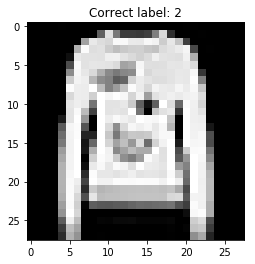

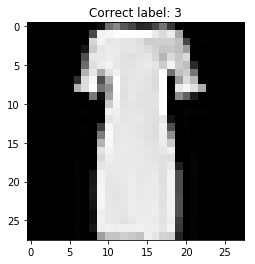

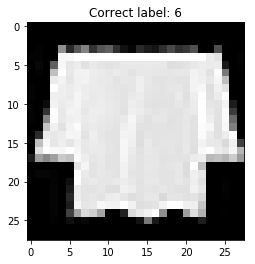

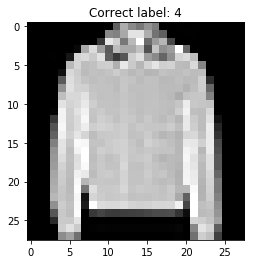

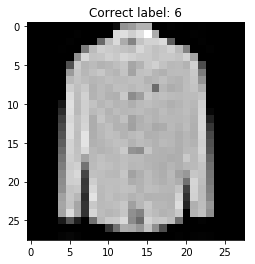

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5000,5005):
    sample = np.reshape(DATA_SETS.test.images[i], (28,28))
    plt.figure()
    plt.title("Correct label: {}".format(DATA_SETS.test.labels[i]))
    plt.imshow(sample, 'gray')


In [13]:
DATA_SETS.train.images.shape

(55000, 784)

In [14]:
DATA_SETS.test.images.shape

(10000, 784)